In [1]:
import pandas as pd
import numpy as np
import os
#import networkx as nx

In [2]:
from sklearn.neighbors import kneighbors_graph

from sklearn import preprocessing as pp
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

import seaborn as sns

In [4]:
Root_Path = "D:/Code/01_Project/01_Side/03_Nexon/0_Data/"

Data_Player_Path = os.path.join(Root_Path, "Player_Excel.xlsx")
Data_Record_Path = os.path.join(Root_Path, "Record_Excel.xlsx")

In [5]:
Player_Data = pd.read_excel(Data_Player_Path, index_col=0)
Player_Data = Player_Data.drop_duplicates(subset=['Name'])
Player_Data = Player_Data.sort_values(by=["Name"], ascending=False)
Player_Data = Player_Data.reset_index(drop=True)

In [6]:
Old_Char = Player_Data["Characteristic"].tolist()

New_Char = []

for i in range(len(Old_Char)):
    if type(Old_Char[i]) == float:
        New_Char.append(["None"])
    else:
        New_Char.append(Old_Char[i].split(", "))
        
New_Char = [list(filter(None, New_Char[i])) for i in range(len(New_Char))]

for i in range(len(New_Char)):
    if New_Char[i] == []:
        New_Char[i] = ["None"]
        
Player_Data["Characteristic"] = New_Char

In [7]:
Player_Data_01 = Player_Data.copy()
Player_Data_01 = Player_Data_01.drop(columns =["Height", "Weight", "Physical", "Skill", "Characteristic"])
Player_Data_01

,Name,속력,가속력,골 결정력,슛 파워,중거리 슛,위치 선정,발리슛,페널티 킥,짧은 패스,...,대인 수비,태클,가로채기,헤더,슬라이딩 태클,몸싸움,스태미너,적극성,점프,침착성
0,VTR 헨릭미키타리안,98,98,95,101,96,103,94,93,104,...,65,67,81,78,66,79,98,81,86,97
1,VTR 프랑크리베리,106,109,96,101,104,98,90,97,97,...,34,37,46,70,29,85,104,79,84,100
2,VTR 페페,98,93,78,79,81,79,59,70,87,...,105,95,98,97,102,99,95,109,106,94
3,VTR 카를로스테베스,101,108,107,106,102,99,97,98,103,...,52,67,59,74,65,96,107,107,87,104
4,VTR 제롬보아텡,102,96,78,96,70,81,75,65,97,...,100,98,95,99,105,105,97,103,98,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,19NG 리스제임스,95,95,64,89,76,77,52,61,86,...,87,91,88,79,87,94,95,84,88,82
353,19NG 레길론,101,98,70,74,60,76,59,48,91,...,93,89,91,88,90,82,97,82,76,87
354,18PLS 페를랑멘디,88,90,66,71,66,81,54,53,78,...,71,76,76,71,77,77,88,78,79,79
355,18PLS 패트릭반안홀트,89,88,68,76,71,76,61,50,74,...,74,76,71,64,77,67,83,76,90,69


In [8]:
Record_Data = pd.read_excel(Data_Record_Path, index_col=0)
Record_Data = Record_Data.drop_duplicates(subset=['Name'])
Record_Data = Record_Data.sort_values(by=["Name"], ascending=False)
Record_Data = Record_Data.reset_index(drop=True)

In [9]:
Record_Data_01 = Record_Data.copy()
Record_Data_01["Attc_Point"] = Record_Data.Attc_Point / Record_Data.Pariticipation
Record_Data_01["Goal"] = Record_Data.Goal / Record_Data.Pariticipation
Record_Data_01["Assistance"] = Record_Data.Assistance / Record_Data.Pariticipation
Record_Data_01["Tar_Shot"] = Record_Data.Tar_Shot / Record_Data.Pariticipation
Record_Data_01["Com_Shot"] = Record_Data.Com_Shot / Record_Data.Pariticipation

Record_Data_01 = Record_Data_01.drop(columns= ["Pariticipation", "Grade","Team", "Goal_Block"])
Record_Data_01

,Name,Attc_Point,Goal,Assistance,Tar_Shot,Com_Shot,Pass_Suss,Dribble_Suss,In_The_Air,Intercept,Tackle_Suss,Block_Suss
0,VTR 헨릭미키타리안,0.471698,0.174528,0.297170,0.424528,0.099057,90.4,86.2,5.2,0.3,42.7,7.4
1,VTR 프랑크리베리,0.408578,0.170805,0.237773,0.406321,0.134688,87.8,86.4,7.7,0.4,44.6,3.4
2,VTR 페페,0.031120,0.018672,0.012448,0.066390,0.045643,71.7,86.9,11.4,1.2,57.0,12.6
3,VTR 카를로스테베스,0.549419,0.311047,0.238372,0.691860,0.186047,91.8,85.7,5.1,0.4,49.2,0.8
4,VTR 제롬보아텡,0.028680,0.018002,0.010679,0.047292,0.041342,76.4,89.7,15.4,1.2,57.6,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...
352,19NG 리스제임스,0.081481,0.007407,0.074074,0.029630,0.029630,81.2,92.2,13.8,0.6,55.7,13.8
353,19NG 레길론,0.054264,0.007752,0.046512,0.015504,0.000000,80.5,89.0,15.2,0.6,47.6,11.4
354,18PLS 페를랑멘디,0.044248,0.008850,0.035398,0.008850,0.000000,83.5,91.6,5.9,0.5,56.3,14.0
355,18PLS 패트릭반안홀트,0.034682,0.000000,0.034682,0.005780,0.000000,79.6,93.0,3.2,0.6,57.5,9.2


In [10]:
Join_data = Player_Data_01.set_index('Name').join(Record_Data_01.set_index('Name'))
Join_data = Join_data.reset_index(drop=True)

In [11]:
Join_data

,속력,가속력,골 결정력,슛 파워,중거리 슛,위치 선정,발리슛,페널티 킥,짧은 패스,시야,...,Goal,Assistance,Tar_Shot,Com_Shot,Pass_Suss,Dribble_Suss,In_The_Air,Intercept,Tackle_Suss,Block_Suss
0,98,98,95,101,96,103,94,93,104,98,...,0.174528,0.297170,0.424528,0.099057,90.4,86.2,5.2,0.3,42.7,7.4
1,106,109,96,101,104,98,90,97,97,102,...,0.170805,0.237773,0.406321,0.134688,87.8,86.4,7.7,0.4,44.6,3.4
2,98,93,78,79,81,79,59,70,87,87,...,0.018672,0.012448,0.066390,0.045643,71.7,86.9,11.4,1.2,57.0,12.6
3,101,108,107,106,102,99,97,98,103,102,...,0.311047,0.238372,0.691860,0.186047,91.8,85.7,5.1,0.4,49.2,0.8
4,102,96,78,96,70,81,75,65,97,88,...,0.018002,0.010679,0.047292,0.041342,76.4,89.7,15.4,1.2,57.6,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,95,95,64,89,76,77,52,61,86,76,...,0.007407,0.074074,0.029630,0.029630,81.2,92.2,13.8,0.6,55.7,13.8
353,101,98,70,74,60,76,59,48,91,75,...,0.007752,0.046512,0.015504,0.000000,80.5,89.0,15.2,0.6,47.6,11.4
354,88,90,66,71,66,81,54,53,78,74,...,0.008850,0.035398,0.008850,0.000000,83.5,91.6,5.9,0.5,56.3,14.0
355,89,88,68,76,71,76,61,50,74,70,...,0.000000,0.034682,0.005780,0.000000,79.6,93.0,3.2,0.6,57.5,9.2


In [12]:
sX = pp.StandardScaler(copy=True)
Standard_X = pd.DataFrame(sX.fit_transform(Join_data), columns= list(Join_data.columns))

In [13]:
X_KNN_Graph = kneighbors_graph(Standard_X, 19, mode='connectivity', include_self=True)

Join_Matrix = cosine_similarity(X_KNN_Graph.toarray())

Join_Result = pd.DataFrame(Join_Matrix)

C:\Users\dmltj\miniconda3\envs\dd\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [14]:
Player_Dict = {Player_Data.index[i] : Player_Data.Name[i] for i in range(len(Player_Data))}

# 4. Evaluation

In [15]:
from numpy.random import default_rng

In [16]:
rng = default_rng()
#Test_Player = list(rng.integers(low=185, high=206, size=10))
Test_Player = list(rng.integers(low=0, high=300, size=10))
Test_Player

[190, 233, 249, 248, 294, 189, 35, 48, 268, 56]

In [17]:
def Regomendation_System(Player_Num, Top_k):
    Searching = list(Join_Result[Player_Num].sort_values(ascending=False).index)
    Searching.remove(Player_Num)
    Searching = Searching[:Top_k]
    
    print(Player_Dict[Player_Num], "의 추천 결과", "\n")
    for i in range(len(Searching)):
        print(Player_Dict[Searching[i]])

In [18]:
Player_Dict

{0: 'VTR 헨릭미키타리안',
 1: 'VTR 프랑크리베리',
 2: 'VTR 페페',
 3: 'VTR 카를로스테베스',
 4: 'VTR 제롬보아텡',
 5: 'VTR 이브라히모비치',
 6: 'VTR 윌리안',
 7: 'VTR 웨인루니',
 8: 'VTR 애슐리영',
 9: 'VTR 알렉시스산체스',
 10: 'VTR 아르투로비달',
 11: 'VTR 세스크파브레가스',
 12: 'VTR 사미케디라',
 13: 'VTR 빅터모지스',
 14: 'VTR 마르셀루',
 15: 'VTR 마루안펠라이니',
 16: 'VTR 루카모드리치',
 17: 'VTR 디에고코스타',
 18: 'VTR 다비드루이스',
 19: 'VTR 나니',
 20: 'VTR 가레스베일',
 21: 'UP 페페',
 22: 'UP 페드로',
 23: 'UP 파비뉴',
 24: 'UP 카르바할',
 25: 'UP 이반페리시치',
 26: 'UP 윌리안',
 27: 'UP 엠레잔',
 28: 'UP 에마뉘엘프티',
 29: 'UP 아스필리쿠에타',
 30: 'UP 사미케디라',
 31: 'UP 빅토르린델뢰프',
 32: 'UP 박지성',
 33: 'UP 마르코스알론소',
 34: 'UP 레온고레츠카',
 35: 'UP 도니반더베이크',
 36: 'UP 니클라스쥘레',
 37: 'UP 나초페르난데스',
 38: 'TT 헤나투산시스',
 39: 'TT 카푸',
 40: 'TT 루크쇼',
 41: 'TT 루드굴리트',
 42: 'TT 라이언버트란드',
 43: 'TT 다비데차파코스타',
 44: 'TC 파올로말디니',
 45: 'TC 아르투로비달',
 46: 'TC 라이언버트란드',
 47: 'TB 마테오다르미안',
 48: 'OTW 에덴아자르',
 49: 'NTG 필립람',
 50: 'NTG 페르난도토레스',
 51: 'NTG 에릭칸토나',
 52: 'NTG 데이비드베컴',
 53: 'NTG 네마냐비디치',
 54: 'NHD 호베르투카를루스',
 55: 'NHD 폴포그바',
 56: 'NHD 파

In [19]:
num = 32
Searching = list(Join_Result[num].sort_values(ascending=False).index)
Searching.remove(num)
Searching = Searching[:5]
print(Player_Dict[num], "의 추천 결과", "\n")
for i in range(len(Searching)):
    print(Player_Dict[Searching[i]])

UP 박지성 의 추천 결과 

21TOTS 마르코스요렌테
MC 호베르투카를루스
MC 로타어마테우스
ICON 마이클에시앙
UP 도니반더베이크


In [20]:
num = 171
Searching = list(Join_Result[num].sort_values(ascending=False).index)
Searching.remove(num)
Searching = Searching[:5]
print(Player_Dict[num], "의 추천 결과", "\n")
for i in range(len(Searching)):
    print(Player_Dict[Searching[i]])

LH 박지성 의 추천 결과 

21TOTY 마테오코바치치
MC 마르셀루
NTG 필립람
20UCL 은골로캉테
VTR 마르셀루


In [21]:
for i in range(len(Test_Player)):
    
    Regomendation_System(Test_Player[i], 10)
    print('\n')

ICON 파울루푸트리 의 추천 결과 

MC 에덴아자르
MC 히바우두
ICON 잔프랑코졸라
MC 호나우지뉴
VTR 프랑크리베리
LH 호나우지뉴
VTR 알렉시스산체스
UP 페드로
21TOTS 멤피스데파이
MC 루이스피구


21TOTY 브루누페르난데스 의 추천 결과 

21TOTS 브루누페르난데스
ICON 프랭크램파드
21TOTS 케빈더브라위너
21TOTY 케빈더브라위너
NTG 데이비드베컴
MC 케빈더브라위너
MC 루드굴리트
ICON 데이비드베컴
ICON 클라렌스세이도르프
20TOTY 케빈더브라위너


21TOTS 메이슨마운트 의 추천 결과 

21TOTS 토니크로스
21TOTS 케빈더브라위너
MC 케빈더브라위너
NTG 데이비드베컴
21TOTS 브루누페르난데스
21TOTY 브루누페르난데스
MC 클라렌스세이도르프
ICON 데이비드베컴
20UCL 케빈더브라위너
ICON 프랭크램파드


21TOTS 멤피스데파이 의 추천 결과 

ICON 잔프랑코졸라
21TOTS 마커스래시포드
21TOTS 모하메드살라
ICON 파울루푸트리
MC 히바우두
ICON 히바우두
MC 카를로스테베스
VTR 카를로스테베스
21TOTY 모하메드살라
MC 호나우지뉴


20TOTY 케빈더브라위너 의 추천 결과 

MC 케빈더브라위너
21TOTS 브루누페르난데스
20UCL 케빈더브라위너
21TOTY 브루누페르난데스
21TOTY 케빈더브라위너
NTG 데이비드베컴
21TOTS 케빈더브라위너
21TOTS 토마스뮐러
21TOTS 토니크로스
ICON 프랭크램파드


ICON 파트리크비에이라 의 추천 결과 

21TOTS 레온고레츠카
ICON 에마뉘엘프티
ICON 프랑크레이카르트
ICON 마이클에시앙
ICON 슈테판에펜베르크
UP 에마뉘엘프티
MC 미하엘발락
UP 사미케디라
21TOTS 마르코스요렌테
20UCL 레온고레츠카


UP 도니반더베이크 의 추천 결과 

VTR 아르투로비달
UP 레온고레츠카
UP 에마뉘엘프티
21TOTS 마르코스요렌테
MC 로타어마테우스
MC 아르투로비달
MC 마이클에시앙
UP 사미케

# 5. Visualization

## Color

In [24]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance

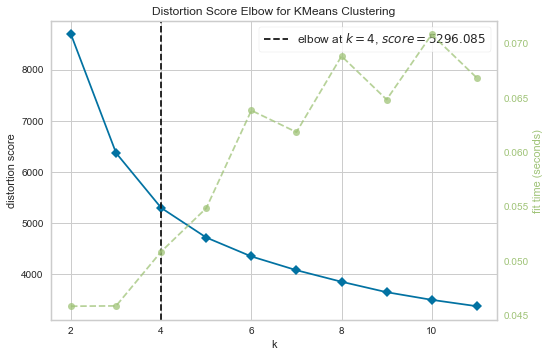

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
KMeans_Model = KMeans()
Visualizer = KElbowVisualizer(KMeans_Model, k=(2,12))
Visualizer.fit(Standard_X)
Visualizer.show()

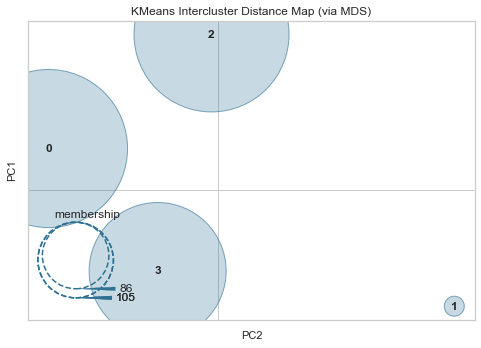

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [26]:
KMeans_Model = KMeans(4)

Dis_Visualizer = InterclusterDistance(KMeans_Model)
Dis_Visualizer.fit(Standard_X)
Dis_Visualizer.show()

C:\Users\dmltj\miniconda3\envs\dd\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


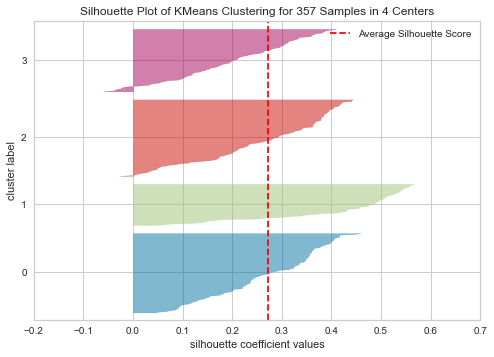

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 357 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [27]:
Sil_Visualizer = SilhouetteVisualizer(KMeans_Model, colors='yellowbrick')
Sil_Visualizer.fit(Standard_X)
Sil_Visualizer.show()

In [28]:
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)

In [29]:
RGB = [[205, 84, 75],
       [123, 182, 232],
       [132, 182, 141],
       [177, 167, 255]
      ]

In [30]:
Color_Palette = []
for i, (r,g,b) in enumerate(RGB):
    Color_Palette.append([i, rgb_to_hex(r,g,b)])

In [31]:
Color_Palette

[[0, '#cd544b'], [1, '#7bb6e8'], [2, '#84b68d'], [3, '#b1a7ff']]

In [32]:
Clus_2_Col = []
for i in range(len(KMeans_Model.labels_)):
    if KMeans_Model.labels_[i] == 0:
        Clus_2_Col.append('#cd544b')
    elif KMeans_Model.labels_[i] == 1:
        Clus_2_Col.append('#7bb6e8')
    elif KMeans_Model.labels_[i] == 2:
        Clus_2_Col.append('#84b68d')
    elif KMeans_Model.labels_[i] == 3:
        Clus_2_Col.append('#b1a7ff')

### Graph

In [37]:
import networkx as nx

In [38]:
Result_Array = np.array(Join_Result)

In [39]:
node_num = len(Result_Array)
Graph_Represetation = []

for i in range(node_num):
    temp = []
    for j in range(node_num):
        temp.append([i, j, Result_Array[i][j]])
        
    Graph_Represetation.append(temp)

In [40]:
Cut_Graph = []
for i in range(len(Graph_Represetation)):
    Cut_Graph.extend(sorted(Graph_Represetation[i], key= lambda edge: edge[2], reverse=True)[:8])

Graph = []
for j in range(len(Cut_Graph)):
    SubGraph = Cut_Graph[j]
    if SubGraph[0] != SubGraph[1]:
        Graph.append(SubGraph)

In [41]:
DiGraph = nx.DiGraph()
DiGraph.add_weighted_edges_from(Graph)
Nodes_Pos = nx.spring_layout(DiGraph)

In [42]:
Player_Dict

{0: 'VTR 헨릭미키타리안',
 1: 'VTR 프랑크리베리',
 2: 'VTR 페페',
 3: 'VTR 카를로스테베스',
 4: 'VTR 제롬보아텡',
 5: 'VTR 이브라히모비치',
 6: 'VTR 윌리안',
 7: 'VTR 웨인루니',
 8: 'VTR 애슐리영',
 9: 'VTR 알렉시스산체스',
 10: 'VTR 아르투로비달',
 11: 'VTR 세스크파브레가스',
 12: 'VTR 사미케디라',
 13: 'VTR 빅터모지스',
 14: 'VTR 마르셀루',
 15: 'VTR 마루안펠라이니',
 16: 'VTR 루카모드리치',
 17: 'VTR 디에고코스타',
 18: 'VTR 다비드루이스',
 19: 'VTR 나니',
 20: 'VTR 가레스베일',
 21: 'UP 페페',
 22: 'UP 페드로',
 23: 'UP 파비뉴',
 24: 'UP 카르바할',
 25: 'UP 이반페리시치',
 26: 'UP 윌리안',
 27: 'UP 엠레잔',
 28: 'UP 에마뉘엘프티',
 29: 'UP 아스필리쿠에타',
 30: 'UP 사미케디라',
 31: 'UP 빅토르린델뢰프',
 32: 'UP 박지성',
 33: 'UP 마르코스알론소',
 34: 'UP 레온고레츠카',
 35: 'UP 도니반더베이크',
 36: 'UP 니클라스쥘레',
 37: 'UP 나초페르난데스',
 38: 'TT 헤나투산시스',
 39: 'TT 카푸',
 40: 'TT 루크쇼',
 41: 'TT 루드굴리트',
 42: 'TT 라이언버트란드',
 43: 'TT 다비데차파코스타',
 44: 'TC 파올로말디니',
 45: 'TC 아르투로비달',
 46: 'TC 라이언버트란드',
 47: 'TB 마테오다르미안',
 48: 'OTW 에덴아자르',
 49: 'NTG 필립람',
 50: 'NTG 페르난도토레스',
 51: 'NTG 에릭칸토나',
 52: 'NTG 데이비드베컴',
 53: 'NTG 네마냐비디치',
 54: 'NHD 호베르투카를루스',
 55: 'NHD 폴포그바',
 56: 'NHD 파

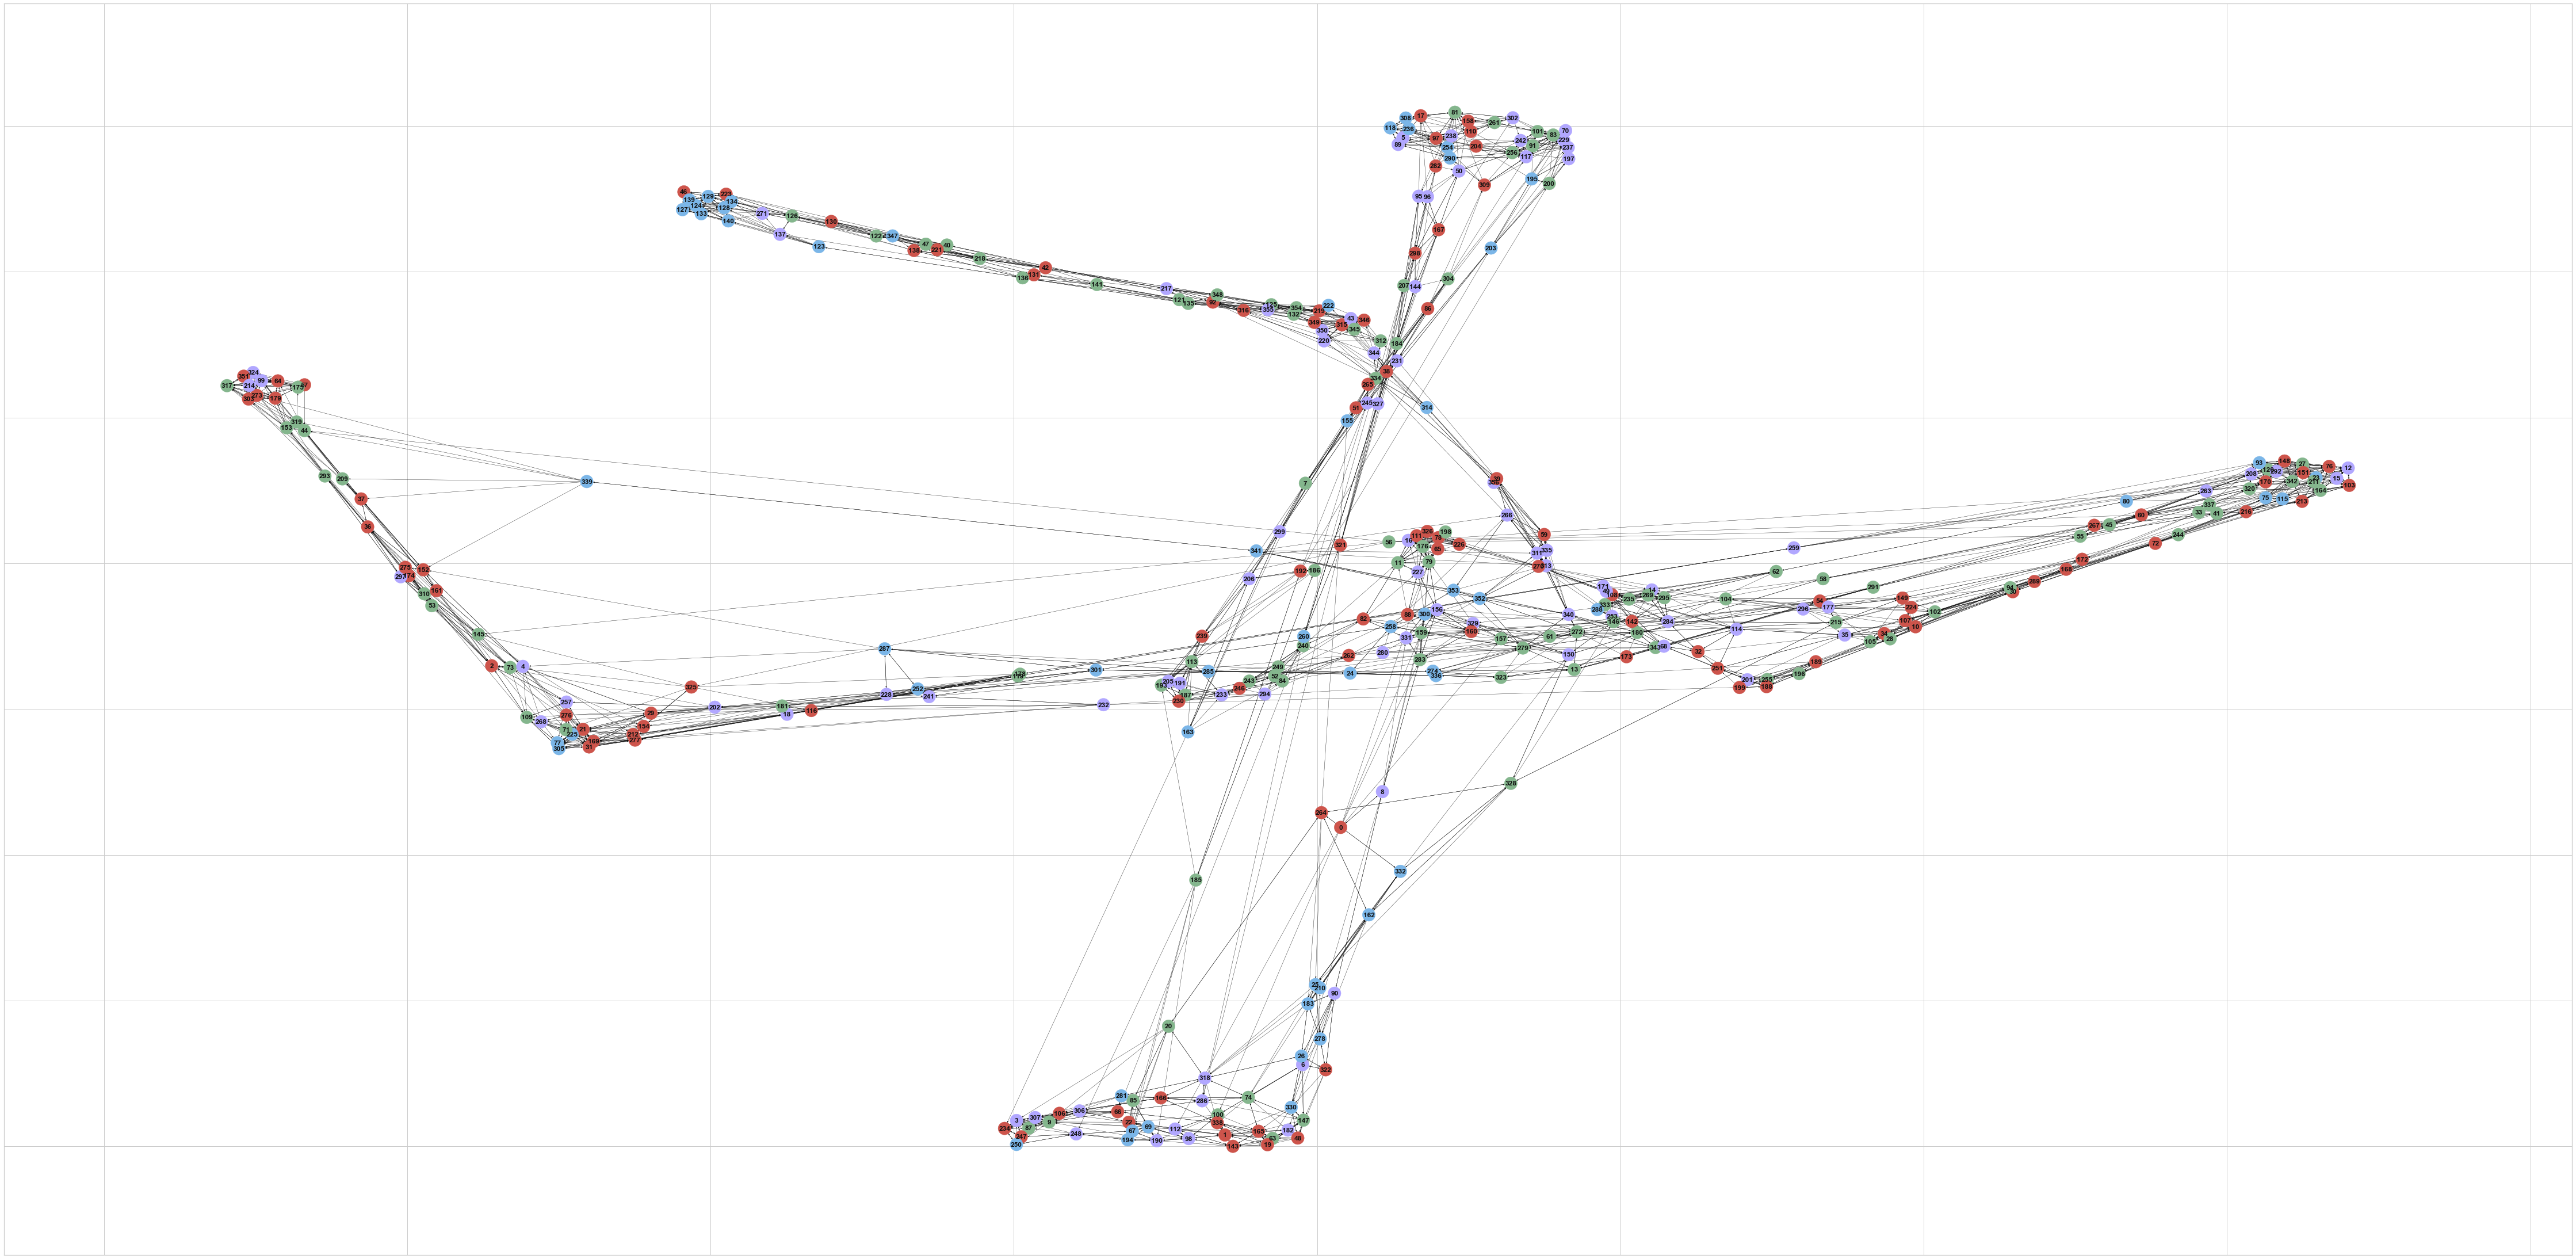

In [60]:
plt.figure(figsize=(80, 40))
nx.draw_networkx(DiGraph, pos=Nodes_Pos, 
                 node_size = 500, arrowsize = 5,
                 linewidths = 0.4, width = 0.4,
                 font_weight='bold', node_color = Clus_2_Col)

In [44]:
Regomendation_System(261, 10)

20UCL 크리스티아누호날두 의 추천 결과 

LH 크리스티아누호날두
20TOTS 크리스티아누호날두
MC 에딘손카바니
MC 안드리셰브첸코
MC 클라위베르트
21TOTS 크리스티아누호날두
MC 크리스티아누호날두
MC 레반도프스키
MC 뤼트반니스텔로이
20UCL 레반도프스키


In [45]:
Player_Dict[163]

'LH 웨인루니'

In [46]:
DF = pd.DataFrame(list(Player_Dict.items()), columns = ['key', 'name'])
DF['cluster'] = KMeans_Model.labels_

In [47]:
Player_Dict[57], Player_Dict[175], Player_Dict[324], Player_Dict[351], Player_Dict[99]

('NHD 파올로말디니', 'LH 리오퍼디난드', '19UCL 피카요토모리', '19NG 악셀투안제베', 'MC 야프스탐')

In [48]:
DF[DF['cluster'] == 0]

,key,name,cluster
0,0,VTR 헨릭미키타리안,0
8,8,VTR 애슐리영,0
10,10,VTR 아르투로비달,0
11,11,VTR 세스크파브레가스,0
12,12,VTR 사미케디라,0
...,...,...,...
331,331,19UCL 케빈더브라위너,0
332,332,19UCL 이반페리시치,0
333,333,19UCL 요주아키미히,0
337,337,19UCL 안데르에레라,0


In [49]:
DF[DF['cluster'] == 1]

,key,name,cluster
38,38,TT 헤나투산시스,1
39,39,TT 카푸,1
40,40,TT 루크쇼,1
42,42,TT 라이언버트란드,1
43,43,TT 다비데차파코스타,1
46,46,TC 라이언버트란드,1
47,47,TB 마테오다르미안,1
57,57,NHD 파올로말디니,1
59,59,NHD 카푸,1
92,92,MC 오드리오솔라,1


In [50]:
DF[DF['cluster'] == 2]

,key,name,cluster
1,1,VTR 프랑크리베리,2
3,3,VTR 카를로스테베스,2
5,5,VTR 이브라히모비치,2
6,6,VTR 윌리안,2
7,7,VTR 웨인루니,2
...,...,...,...
322,322,20NG 대니얼제임스,2
327,327,19UCL 티모베르너,2
328,328,19UCL 토마스뮐러,2
330,330,19UCL 킹슬레코망,2


In [51]:
DF[DF['cluster'] == 3]

,key,name,cluster
2,2,VTR 페페,3
4,4,VTR 제롬보아텡,3
13,13,VTR 빅터모지스,3
18,18,VTR 다비드루이스,3
21,21,UP 페페,3
...,...,...,...
341,341,19UCL 뤼카에르난데스,3
343,343,19UCL 데이비드알라바,3
351,351,19NG 악셀투안제베,3
352,352,19NG 리스제임스,3


In [64]:
DF[DF.cluster == 1]

,key,name,cluster
38,38,TT 헤나투산시스,1
39,39,TT 카푸,1
40,40,TT 루크쇼,1
42,42,TT 라이언버트란드,1
43,43,TT 다비데차파코스타,1
46,46,TC 라이언버트란드,1
47,47,TB 마테오다르미안,1
57,57,NHD 파올로말디니,1
59,59,NHD 카푸,1
92,92,MC 오드리오솔라,1


In [65]:
DF[DF.cluster == 0]

,key,name,cluster
0,0,VTR 헨릭미키타리안,0
8,8,VTR 애슐리영,0
10,10,VTR 아르투로비달,0
11,11,VTR 세스크파브레가스,0
12,12,VTR 사미케디라,0
...,...,...,...
331,331,19UCL 케빈더브라위너,0
332,332,19UCL 이반페리시치,0
333,333,19UCL 요주아키미히,0
337,337,19UCL 안데르에레라,0


In [70]:
X_KNN_Graph.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# 창고

In [52]:
from sklearn.cluster import AgglomerativeClustering
import time

In [53]:
Join_Result

,0,1,2,3,4,5,6,7,8,9,...,347,348,349,350,351,352,353,354,355,356
0,1.000000,0.368421,0.000000,0.210526,0.000000,0.0,0.421053,0.000000,0.473684,0.263158,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.368421,1.000000,0.000000,0.473684,0.000000,0.0,0.473684,0.000000,0.052632,0.578947,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.684211,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.210526,0.473684,0.000000,1.000000,0.000000,0.0,0.157895,0.157895,0.000000,0.789474,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.684211,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.052632,0.105263,0.263158,0.052632,1.000000,0.736842,0.105263,0.052632,0.473684
353,0.000000,0.000000,0.000000,0.000000,0.052632,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.052632,0.105263,0.263158,0.105263,0.736842,1.000000,0.105263,0.052632,0.368421
354,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.526316,0.684211,0.736842,0.631579,0.000000,0.105263,0.105263,1.000000,0.789474,0.315789
355,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.578947,0.684211,0.684211,0.473684,0.000000,0.052632,0.052632,0.789474,1.000000,0.315789


In [59]:
Standard_X

,속력,가속력,골 결정력,슛 파워,중거리 슛,위치 선정,발리슛,페널티 킥,짧은 패스,시야,...,Goal,Assistance,Tar_Shot,Com_Shot,Pass_Suss,Dribble_Suss,In_The_Air,Intercept,Tackle_Suss,Block_Suss
0,0.138316,0.247246,0.539169,0.664888,0.435290,0.875590,0.704340,0.544527,1.016910,0.849435,...,-0.023060,1.046877,0.034722,-0.265784,0.390994,-0.828681,-0.951051,-1.056295,-0.848916,0.039250
1,1.056994,1.397642,0.593101,0.664888,0.865906,0.528966,0.478013,0.757215,0.332304,1.181853,...,-0.039229,0.582158,-0.003553,-0.001570,0.049807,-0.774314,-0.369154,-0.769529,-0.594275,-0.754649
2,0.138316,-0.275661,-0.377675,-0.977777,-0.372115,-0.788206,-1.276022,-0.678425,-0.645705,-0.064714,...,-0.699923,-1.180770,-0.718134,-0.661859,-2.062927,-0.638396,0.492054,1.524599,1.067593,1.071319
3,0.482821,1.293060,1.186352,1.038221,0.758252,0.598291,0.874086,0.810387,0.919109,1.181853,...,0.569821,0.586847,0.596692,0.379269,0.574710,-0.964599,-0.974327,-0.769529,0.022224,-1.270683
4,0.597655,0.038083,-0.377675,0.291555,-0.964212,-0.649556,-0.370714,-0.944284,0.332304,0.018390,...,-0.702836,-1.194613,-0.758281,-0.693750,-1.446166,0.122745,1.423089,1.524599,1.148006,1.249946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,-0.206188,-0.066499,-1.132723,-0.231111,-0.641250,-0.926856,-1.672095,-1.156972,-0.743506,-0.978864,...,-0.748844,-0.698612,-0.795410,-0.780604,-0.816283,0.802335,1.050675,-0.195997,0.893365,1.309489
353,0.482821,0.247246,-0.809131,-1.351109,-1.502481,-0.996180,-1.276022,-1.848206,-0.254501,-1.061968,...,-0.747348,-0.914259,-0.825104,-1.000315,-0.908141,-0.067540,1.376537,-0.195997,-0.192210,0.833149
354,-1.010031,-0.589406,-1.024859,-1.575109,-1.179520,-0.649556,-1.558931,-1.582347,-1.525913,-1.145073,...,-0.742581,-1.001210,-0.839093,-1.000315,-0.514464,0.639233,-0.788120,-0.482763,0.973778,1.349184
355,-0.895196,-0.798569,-0.916995,-1.201776,-0.910385,-0.996180,-1.162859,-1.741862,-1.917117,-1.477491,...,-0.781014,-1.006813,-0.845545,-1.000315,-1.026244,1.019804,-1.416569,-0.195997,1.134604,0.396505


In [58]:
plt.scatter(Standard_X[:, 0], Standard_X[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)

InvalidIndexError: (slice(None, None, None), 0)

InvalidIndexError: (slice(None, None, None), 0)

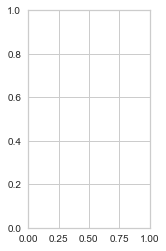

In [54]:
for connectivity in (None, X_KNN_Graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(("average", "complete", "ward", "single")):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(
                linkage=linkage, connectivity=connectivity, n_clusters=n_clusters
            )
            t0 = time.time()
            model.fit(Standard_X)
            elapsed_time = time.time() - t0
            plt.scatter(Standard_X[:, 0], Standard_X[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
            plt.title(
                "linkage=%s\n(time %.2fs)" % (linkage, elapsed_time),
                fontdict=dict(verticalalignment="top"),
            )
            plt.axis("equal")
            plt.axis("off")

            plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
            plt.suptitle(
                "n_cluster=%i, connectivity=%r"
                % (n_clusters, connectivity is not None),
                size=17,
            )


plt.show()

In [57]:
X_KNN_Graph.

<357x357 sparse matrix of type '<class 'numpy.float64'>'
	with 6783 stored elements in Compressed Sparse Row format>

In [55]:
Standard_X

,속력,가속력,골 결정력,슛 파워,중거리 슛,위치 선정,발리슛,페널티 킥,짧은 패스,시야,...,Goal,Assistance,Tar_Shot,Com_Shot,Pass_Suss,Dribble_Suss,In_The_Air,Intercept,Tackle_Suss,Block_Suss
0,0.138316,0.247246,0.539169,0.664888,0.435290,0.875590,0.704340,0.544527,1.016910,0.849435,...,-0.023060,1.046877,0.034722,-0.265784,0.390994,-0.828681,-0.951051,-1.056295,-0.848916,0.039250
1,1.056994,1.397642,0.593101,0.664888,0.865906,0.528966,0.478013,0.757215,0.332304,1.181853,...,-0.039229,0.582158,-0.003553,-0.001570,0.049807,-0.774314,-0.369154,-0.769529,-0.594275,-0.754649
2,0.138316,-0.275661,-0.377675,-0.977777,-0.372115,-0.788206,-1.276022,-0.678425,-0.645705,-0.064714,...,-0.699923,-1.180770,-0.718134,-0.661859,-2.062927,-0.638396,0.492054,1.524599,1.067593,1.071319
3,0.482821,1.293060,1.186352,1.038221,0.758252,0.598291,0.874086,0.810387,0.919109,1.181853,...,0.569821,0.586847,0.596692,0.379269,0.574710,-0.964599,-0.974327,-0.769529,0.022224,-1.270683
4,0.597655,0.038083,-0.377675,0.291555,-0.964212,-0.649556,-0.370714,-0.944284,0.332304,0.018390,...,-0.702836,-1.194613,-0.758281,-0.693750,-1.446166,0.122745,1.423089,1.524599,1.148006,1.249946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,-0.206188,-0.066499,-1.132723,-0.231111,-0.641250,-0.926856,-1.672095,-1.156972,-0.743506,-0.978864,...,-0.748844,-0.698612,-0.795410,-0.780604,-0.816283,0.802335,1.050675,-0.195997,0.893365,1.309489
353,0.482821,0.247246,-0.809131,-1.351109,-1.502481,-0.996180,-1.276022,-1.848206,-0.254501,-1.061968,...,-0.747348,-0.914259,-0.825104,-1.000315,-0.908141,-0.067540,1.376537,-0.195997,-0.192210,0.833149
354,-1.010031,-0.589406,-1.024859,-1.575109,-1.179520,-0.649556,-1.558931,-1.582347,-1.525913,-1.145073,...,-0.742581,-1.001210,-0.839093,-1.000315,-0.514464,0.639233,-0.788120,-0.482763,0.973778,1.349184
355,-0.895196,-0.798569,-0.916995,-1.201776,-0.910385,-0.996180,-1.162859,-1.741862,-1.917117,-1.477491,...,-0.781014,-1.006813,-0.845545,-1.000315,-1.026244,1.019804,-1.416569,-0.195997,1.134604,0.396505


In [56]:
model.labels_

array([ 0,  0,  7,  0,  7,  3,  0, 10,  0,  0,  1,  1,  1,  4,  1,  1,  1,
        3,  7, 24,  0,  7,  0,  1,  4,  0,  0,  1,  1,  7,  1,  7,  1,  6,
        1,  1, 14,  2, 11, 11, 28,  1, 28, 28,  2, 13, 25, 28, 12,  1,  3,
       10, 22,  7,  4, 13, 13, 26, 27, 11, 13,  1,  1,  0,  2,  1,  0,  0,
        6,  0,  3,  7,  1,  7,  0,  1,  1,  7,  1,  1, 23,  3,  1,  3,  1,
        0, 10,  0,  1,  3,  0,  3, 28,  1,  1,  3,  3,  3,  0, 16,  0,  3,
        1,  1,  1,  1,  0,  1,  1,  7,  3,  1,  0, 10,  1,  1,  7,  3,  3,
        7,  1, 28, 28, 28, 17, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28,  6,  0,  3,  7,  1, 12,  1,  1, 27,  1,  2,
        2,  7, 10,  1,  1,  3,  1,  1,  7,  0, 10,  1,  0,  0,  3,  1,  7,
        1,  1,  1,  4,  7,  2,  1,  1,  7,  2,  4,  7, 24,  0,  3,  0,  5,
       22, 15, 15,  0, 22,  5, 22,  0,  5, 15,  5, 21, 15,  5, 15, 19,  5,
       20, 22, 10,  3,  1,  2,  0,  1,  7,  1,  2,  1,  1, 28, 28, 28, 28,
       28, 28, 28,  1,  7